In [1]:
import pandas as pd
import numpy as np

import utils
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *
from ego_graph_dataset import *

/home/elouan/.local/lib/python3.8/site-packages/torch_geometric/typing.py:31: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /home/elouan/.local/lib/python3.8/site-packages/torch_scatter/_scatter_cpu.so: undefined symbol: _ZN2at4_ops6narrow4callERKNS_6TensorElll
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/home/elouan/.local/lib/python3.8/site-packages/torch_geometric/typing.py:42: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /home/elouan/.local/lib/python3.8/site-packages/torch_sparse/_diag_cpu.so: undefined symbol: _ZN3c106detail19maybe_wrap_dim_slowEllb
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "


In [2]:
dataset_name = 'mutagenicity'
available_metrics = ["sum", "entropy", "cosine", "cheb", "likelyhood", "likelyhood_max", "hamming",
                           "focal_loss"]

In [11]:
def plot_explanation(metric='cosine', rule=23, graph_id=1, fixed_size=True, size=3):
    data = select_active_graph(f"/home/elouan/epita/lre/gnn_explainability/src/activ_ego/mutag_{rule}labels_egos.txt", index_to_select=[graph_id])
    data = data[0]
    df_node_score = pd.read_csv(os.path.join("./results/mutagenicity/gcn/gstarx",
                             f"result_{dataset_name}_{rule}_{graph_id}.csv"))
    node_score = df_node_score[metric].values
    coalition = scores2coalition(node_score, sparsity=0.5, fixed_size=True, size=3)
    title_sentence = f"Explanation {dataset_name} rule {rule} with {metric} for graph {graph_id}:"
    node_attrs = data.x
    data['label'] = node_attrs
    plot = PlotUtils(dataset_name, is_show=True)
    plot.plot(utils.to_networkx(data,to_undirected=True, node_attrs=['label', 'center']),
              coalition, x=data.x,words='', title_sentence=title_sentence,figname='test.png')

In [12]:
def plot_correlation_matrix(rule, graph_id,method='kendall'):
    df_node_score = pd.read_csv(os.path.join("./results/mutagenicity/gcn/gstarx",
                             f"result_{dataset_name}_{rule}_{graph_id}.csv"))
    corr = df_node_score.corr(method=method)
    sns.set(style="whitegrid")
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5, ax=ax)
    plt.show()

In [13]:
def plot_explanation_and_correlation(rule, graph_id, method='kendall', metric='cosine'):
    plot_explanation(metric=metric, rule=rule, graph_id=graph_id)
    plot_correlation_matrix(rule=rule, graph_id=graph_id, method=method)

def plot_explanation_for_list_of_graphs(rule, list_of_graphs, metric='cosine', method='kendall'):
    for graph_id in list_of_graphs:
        plot_explanation(metric=metric, rule=rule, graph_id=graph_id)
        df_nodes_score = pd.read_csv(os.path.join("./results/mutagenicity/gcn/gstarx",
                             f"result_{dataset_name}_{rule}_{graph_id}.csv"))
        print(np.sort(df_nodes_score[metric].values))

def plot_explanation_and_corr_for_list_of_graphs(rule, list_of_graphs, metrics=['cosine'], method='kendall'):
    for graph_id in list_of_graphs:
        for metric in metrics:
            plot_explanation_and_correlation(rule=rule, graph_id=graph_id, method=method, metric=metric)

Number of graphs: 3490


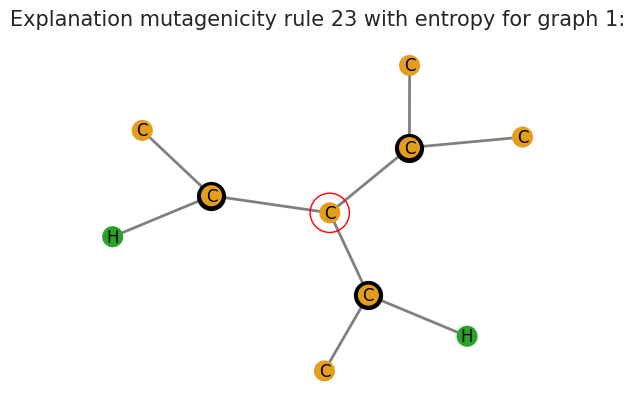

[-74.28086853 -74.28038025 -43.23755646 -43.23753738 -43.23749924
 -43.23721313  31.12254333  31.12259102  57.81666183  57.81701279]
Number of graphs: 3490


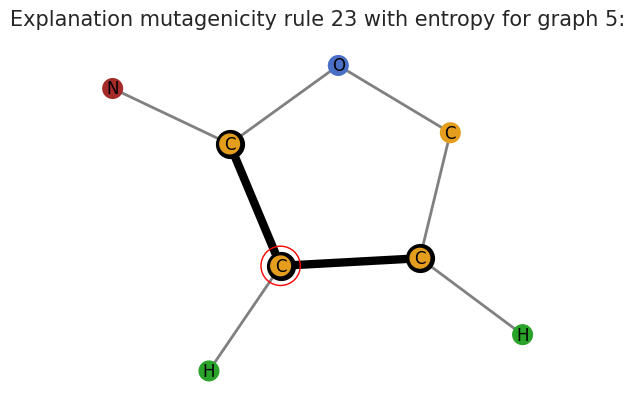

[-74.28097534 -74.28039551 -51.5457077  -23.79007721  -4.70017147
  30.79803848  50.34796906  50.34815216]
Number of graphs: 3490


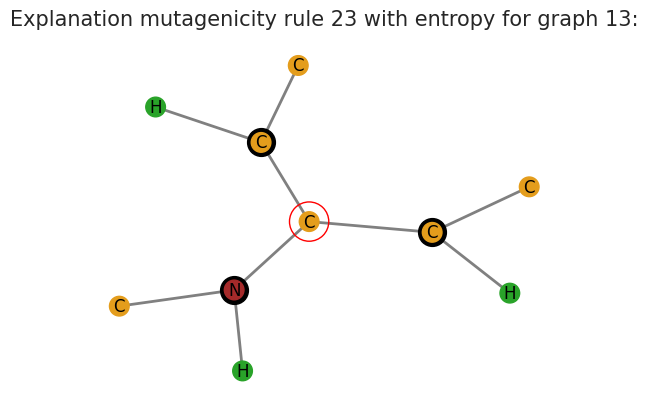

[-74.28091431 -74.28084564 -74.28037262 -43.23754883 -43.23752213
 -43.23725128  38.26675034  49.50885773  57.81655121  57.81692505]


In [15]:
plot_explanation_for_list_of_graphs(rule=23, list_of_graphs=[1,5,13], metric='entropy', method='kendall')

In [17]:
from pattern_mining import pattern_frequency
import numpy as np
frequent_itemsets, a_rules = pattern_frequency('results/mutagenicity/gcn/gstarx', metric="entropy", rule=23,
                  dataset_name="mutagenicity", graph_ids=np.arange(0, 2581), fixed_size=True, size=3, sparsity=0.5)


Building transactions...

Number of graphs: 3490


/home/elouan/epita/lre/gnn_explainability/src/ego_graph_dataset.py:18: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if index_to_select == []:
100%|██████████| 2581/2581 [00:05<00:00, 446.40it/s]


Skipped 0 graphs because the corresponding file is empty. The size of the graph can lead to a to long HN value computation and therefore, we chose to skip the graph. Here is the detail of skipped graphs with their size:
 []


Transactions built.

/home/elouan/.local/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [18]:
frequent_itemsets.sort_values(by='support', ascending=False)

,support,itemsets
1,1.000000,(H)
0,0.997675,(C)
3,0.997675,"(H, C)"
2,0.469198,(N)
5,0.469198,"(H, N)"
4,0.466873,"(N, C)"
6,0.466873,"(H, N, C)"


In [19]:
a_rules.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(C),(H),0.997675,1.000000,0.997675,1.000000,1.000000,0.000000,inf,0.000000
3,(N),(H),0.469198,1.000000,0.469198,1.000000,1.000000,0.000000,inf,0.000000
5,"(N, C)",(H),0.466873,1.000000,0.466873,1.000000,1.000000,0.000000,inf,0.000000
0,(H),(C),1.000000,0.997675,0.997675,0.997675,1.000000,0.000000,1.000000,0.000000
2,(N),(C),0.469198,0.997675,0.466873,0.995045,0.997364,-0.001234,0.469198,-0.004955
4,"(H, N)",(C),0.469198,0.997675,0.466873,0.995045,0.997364,-0.001234,0.469198,-0.004955
6,(N),"(H, C)",0.469198,0.997675,0.466873,0.995045,0.997364,-0.001234,0.469198,-0.004955


# TODO
- [ ] approximation de la HN value pour les graphes >10
- [ ] sous-graph dans les transactions

In [20]:
from build_transaction import build_counting_transaction
import numpy as np

In [22]:
transactions = build_counting_transaction('results/mutagenicity/gcn/gstarx', metric="entropy", rule=23,
                  dataset_name="mutagenicity", graph_ids=np.arange(0, 3490), fixed_size=True, size=3, sparsity=0.5)

/home/elouan/epita/lre/gnn_explainability/src/build_transaction.py:93: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  result_series = pd.Series(


Number of graphs: 3490


/home/elouan/epita/lre/gnn_explainability/src/ego_graph_dataset.py:18: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if index_to_select == []:
100%|██████████| 3490/3490 [00:06<00:00, 567.52it/s]


Skipped 67 graphs because the corresponding file is empty. The size of the graph can lead to a to long HN value computation and therefore, we chose to skip the graph. Here is the detail of skipped graphs with their size:
 [(2589, 11), (2638, 11), (2639, 11), (2644, 11), (2676, 11), (2679, 11), (2703, 13), (2706, 13), (2736, 11), (2737, 12), (2762, 11), (2766, 13), (2778, 12), (2779, 12), (2828, 11), (2829, 11), (2842, 11), (2879, 11), (2884, 11), (2909, 12), (2920, 12), (2953, 13), (2962, 13), (3004, 11), (3024, 12), (3025, 12), (3043, 11), (3044, 11), (3045, 11), (3046, 11), (3049, 11), (3050, 11), (3078, 11), (3084, 11), (3086, 11), (3090, 11), (3091, 11), (3127, 11), (3137, 11), (3155, 11), (3172, 11), (3179, 11), (3181, 11), (3207, 11), (3233, 13), (3239, 11), (3249, 11), (3274, 11), (3275, 11), (3283, 11), (3316, 11), (3342, 13), (3349, 11), (3353, 11), (3354, 11), (3357, 11), (3380, 11), (3395, 11), (3409, 11), (3413, 11), (3447, 11), (3448, 11), (3452, 11), (3455, 12), (3475, 12

In [23]:
transactions.head()

0    [C1, C2, C3, C4, H1, H2, H3]
1    [C1, C2, C3, C4, C5, H1, H2]
2    [C1, C2, C3, C4, C5, H1, H2]
3    [C1, C2, C3, C4, C5, H1, H2]
4            [C1, C2, O1, H1, N1]
dtype: object

In [27]:
# Perform LCM closed pattern mining
from skmine.itemsets import LCM

In [28]:
lcm = LCM(min_supp=1000, n_jobs=4)

In [29]:
pattern = lcm.fit_transform(transactions)
print(pattern.shape)
pattern

(15, 2)


,itemset,support
0,[H1],3423
1,"[C1, H1]",3416
2,"[C1, C2, H1]",3330
3,"[H1, H2]",2732
4,"[C1, H1, H2]",2725
5,"[C1, C2, H1, H2]",2639
6,"[C1, C2, C3, H1]",2225
7,"[C1, C2, C3, H1, H2]",1799
8,"[H1, N1]",1562
9,"[C1, H1, N1]",1555
